# Swire Cola Capstone Project

## By: Kurtis Castellanos

# Forecast Commodity Pricing 

### Business Problem:

Swire Coca-Cola requires a multitude of raw materials in order to provide customers with their product. The cost of these raw materials fluctuate, and ensuring a timely purchase can cause profit margins to increase or decrease accordingly. Having an accurate forecast on the cost of these raw materials will allow Swire to maintain the highest profit margins while also controlling inventory management and production planning. 

Swire Coca-Cola does a great job at providing sufficient production of beverages to meet all of it’s required orders. The purpose of this project is to ensure that this timely production is maintained while also keeping profits as high as possible. In order to do this this project will perform forecasting analytics, specifically:
1.	Forecast the price of these commodities for the next 3 months and then for the next year. The most conservative (highest prices) will be used to determine these forecasts.
2.	Create a dashboard to show the profit scenarios with various price points of materials.

Stakeholders and management may judge if this is a success by retroactively viewing the cost of these materials over the course of the year to see if they were bought at a near-optimal time. The benchmark for success will be buying these products will be if their minimum cost is relatively close to the cost they were purchased at.

The project deliverable will be the profit dashboard showing the various scenarios for maximum profit. Any other deliverables such as cost trends over the year will need to be agreed upon and added to a revised business problem statement.

The project will be completed by April 20th, with the draft completed 2 weeks prior. This timeline will allow for the materials team to make accurate purchasing decisions for the rest of the fiscal year.


### Analytic Objective:

The goal of this analytic project is to optimize the purchasing strategy for these commodities in order to maximize the profit of Swire Coca-Cola. Through the use of predictive analytics, we will be able to determine the flucuation patterns of these commodities and hopefully recommend the cheapest time to buy them. As stated in the business statement, this can be determined by retroactivley seeing if the commodities were purchased close to their lowest values. The objective of this study is to allow Swire Coca-Cola to make the most informed decision when purchasing their commodities.

### Questions to Guide Exploratory data analysis

1. Does the data need to be adjusted in any way?
2. Is there any missing data that would hinder analysis?
3. Is there a natrual increase in commodity price as time goes on?
4. Are any of the variables related to each other in any way and can be used to predict each other?
5. Are there times of the year where price seems to be at a high or a low every single year?
6. Do there appear to be any outliers in any of the variables?
7. Do they data types of each column make sense or do they need to be changed?
8. Are there any dates that are duplicated in the data?
9. Is 2019 early enough to do accurate forecasting or do I need to go back further?

## Part 1: Exploring and Cleaning Data

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [86]:
df_prices = pd.read_csv('Swire_data.csv')

In [87]:
df_prices.head()

,date,Sugar Price per lb,Soybean Price per lb,Cotton Price per lb,Corn Price per lb,Coffee Price per lb,Soybean Oil price per lb,Aluminum Price per ton
0,7/1/2019,0.1257,8.8975,0.6597,4.1550,1.1135,0.2813,1794.0
1,7/2/2019,0.1235,8.7975,0.6657,4.1900,1.0965,0.2781,1782.0
2,7/3/2019,0.1254,8.8975,0.6655,4.3675,1.1365,0.2817,1790.0
3,7/4/2019,0.1254,8.7600,0.6655,4.3875,1.1365,0.2756,1807.0
4,7/5/2019,0.1236,8.7900,0.6624,4.3950,1.1110,0.2799,1803.0


This dataset was compiled by me by combining the data of the closing price of various commodities over the same time frame. The time from mid year 2019-2023 will allow for several years of fluctuation to determine our forecast. This also accounts for pre covid prices in to ensure that any 2020 numbers are not the starting point of our model.

The first thing that can be noticed is that the Aluminum column has price per ton rather than price per pound which is how all the other columns are measured. We will need to change that column to price per lb to accurately forecast all of these commodities in a comparable manner. This can be done by dividing the price per ton by 2000 since there are 2000 pounds in a ton

In [88]:
df_prices['Aluminum Price per lb'] = df_prices['Aluminum Price per ton']/2000

Now that the new column has been added we can drop the price per ton column as it is no longer needed.

In [89]:
df_prices = df_prices.drop(['Aluminum Price per ton'], axis = 1)

In [90]:
df_prices.head()

,date,Sugar Price per lb,Soybean Price per lb,Cotton Price per lb,Corn Price per lb,Coffee Price per lb,Soybean Oil price per lb,Aluminum Price per lb
0,7/1/2019,0.1257,8.8975,0.6597,4.1550,1.1135,0.2813,0.8970
1,7/2/2019,0.1235,8.7975,0.6657,4.1900,1.0965,0.2781,0.8910
2,7/3/2019,0.1254,8.8975,0.6655,4.3675,1.1365,0.2817,0.8950
3,7/4/2019,0.1254,8.7600,0.6655,4.3875,1.1365,0.2756,0.9035
4,7/5/2019,0.1236,8.7900,0.6624,4.3950,1.1110,0.2799,0.9015


In [91]:
# We will check the info of our dataset to see how many null values are in each column and also the data type of each column.

df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      942 non-null    object 
 1   Sugar Price per lb        942 non-null    float64
 2   Soybean Price per lb      929 non-null    float64
 3    Cotton Price per lb      942 non-null    float64
 4   Corn Price per lb         930 non-null    float64
 5   Coffee Price per lb       942 non-null    float64
 6   Soybean Oil price per lb  942 non-null    float64
 7   Aluminum Price per lb     918 non-null    float64
dtypes: float64(7), object(1)
memory usage: 59.0+ KB


In [92]:
df_prices.isnull().sum(axis = 0)

date                         0
Sugar Price per lb           0
Soybean Price per lb        13
 Cotton Price per lb         0
Corn Price per lb           12
Coffee Price per lb          0
Soybean Oil price per lb     0
Aluminum Price per lb       24
dtype: int64

In [93]:
# I am guessing that the null values all appear in the ends of the graph as some of the data for recent weeks was missing for some of the commodities.

df_prices['Aluminum Price per lb'].tail()


937   NaN
938   NaN
939   NaN
940   NaN
941   NaN
Name: Aluminum Price per lb, dtype: float64

In [94]:
df_prices['Corn Price per lb'].tail()

937   NaN
938   NaN
939   NaN
940   NaN
941   NaN
Name: Corn Price per lb, dtype: float64

In [95]:
df_prices['Soybean Price per lb'].tail()

937   NaN
938   NaN
939   NaN
940   NaN
941   NaN
Name: Soybean Price per lb, dtype: float64

In [96]:
# It appears the missing values are at the end dates of the commodities, I am not worried about this as it is a small amount and an accurate forecast can still be made without it.

In [97]:
# Find any duplicates

dup_prices = df_prices.duplicated(keep='first').sum()

print('There are {} duplicate rows in df_prices based on all columns'
      .format(dup_prices))

There are 0 duplicate rows in df_prices based on all columns


<AxesSubplot:xlabel='date'>

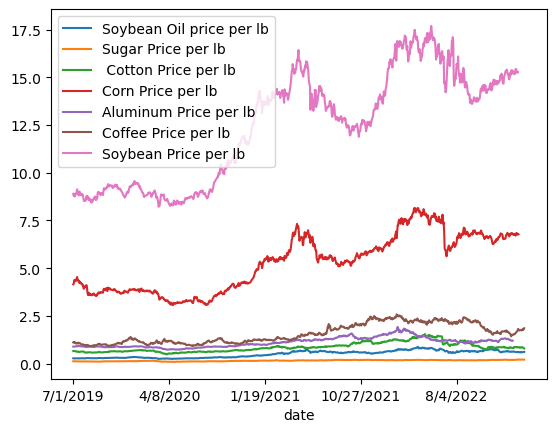

In [98]:
# Do any of the variables naturally increase as time goes on? We can make a plot to visualize it.

df_prices.plot(x='date', y=['Soybean Oil price per lb', 'Sugar Price per lb', ' Cotton Price per lb', 'Corn Price per lb', 'Aluminum Price per lb', 'Coffee Price per lb', 'Soybean Price per lb'], kind= 'line')

<AxesSubplot:xlabel='date'>

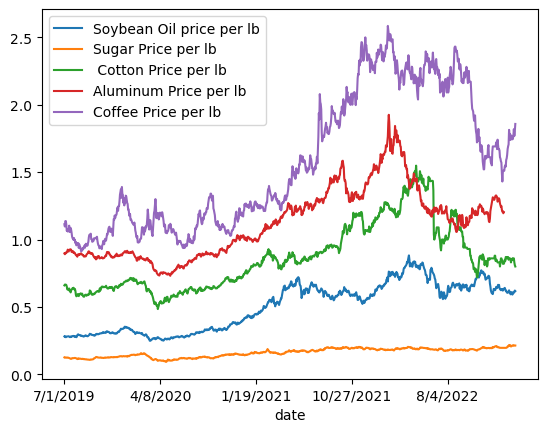

In [99]:
# It looks like the price of soybeans and corn is much higher than the others so we can remove them to look more closely at the other variables.
# It does appear however, that the commodities slightly increase over time.

df_prices.plot(x='date', y=['Soybean Oil price per lb', 'Sugar Price per lb', ' Cotton Price per lb', 'Aluminum Price per lb', 'Coffee Price per lb'], kind= 'line')

In [100]:
# The graphs seem to follow a similar pattern indicating that the variables could correlate with each other. We can test for this now.

df_prices.corr()

,Sugar Price per lb,Soybean Price per lb,Cotton Price per lb,Corn Price per lb,Coffee Price per lb,Soybean Oil price per lb,Aluminum Price per lb
Sugar Price per lb,1.000000,0.857527,0.796369,0.870247,0.818605,0.895233,0.853571
Soybean Price per lb,0.857527,1.000000,0.825628,0.955591,0.776201,0.945388,0.816524
Cotton Price per lb,0.796369,0.825628,1.000000,0.855225,0.901343,0.858055,0.827813
Corn Price per lb,0.870247,0.955591,0.855225,1.000000,0.821174,0.961873,0.816430
Coffee Price per lb,0.818605,0.776201,0.901343,0.821174,1.000000,0.839420,0.841054
Soybean Oil price per lb,0.895233,0.945388,0.858055,0.961873,0.839420,1.000000,0.855604
Aluminum Price per lb,0.853571,0.816524,0.827813,0.816430,0.841054,0.855604,1.000000


Unsurprisingly, Soybean price and Soybean Oil price appear to be very correlated. However, it also appears every variable is decently correlated with each other. The lowest correlation is about .8 which is very high. This suggests that it might be in the best interest to buy these commodities near the same time or that the downward trend of some commodities indicate a downward trend of others.

In [101]:
# Next we can use describe() to find out if there appear to be any outliers in the data and just get a good idea of the summary statistics of the data.

df_prices.describe()

,Sugar Price per lb,Soybean Price per lb,Cotton Price per lb,Corn Price per lb,Coffee Price per lb,Soybean Oil price per lb,Aluminum Price per lb
count,942.000000,929.000000,942.000000,930.000000,942.000000,942.000000,918.000000
mean,0.160753,12.466635,0.862030,5.285293,1.569316,0.504071,1.120569
std,0.031968,2.886521,0.244849,1.467582,0.500667,0.177419,0.256165
min,0.092400,8.217500,0.484100,3.064500,0.911500,0.249900,0.730925
25%,0.128125,9.132500,0.647200,3.828125,1.110125,0.312050,0.890106
50%,0.169350,13.118500,0.830000,5.465000,1.414500,0.560250,1.116875
75%,0.188775,14.790000,1.010000,6.596875,2.090000,0.648075,1.282023
max,0.217800,17.690000,1.547600,8.157500,2.583500,0.882000,1.924500


It doesn't appear that there are any outliers. This can be seen by looking at the size of the standard deviation in comparision to the mean. It is expected that there should not be any outliers as the data is from a time series of price changes daily which does not vary that much.

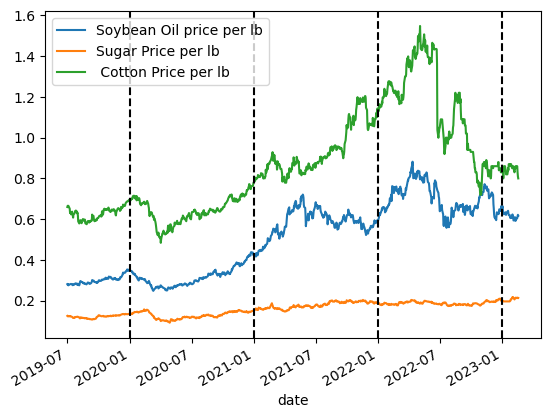

In [102]:
# Now we can check for any seasonality changes. We will plot only a few columns at a time so it is more readable.

df_prices['date'] = pd.to_datetime(df_prices['date'])

ax = df_prices.plot(x='date', y=['Soybean Oil price per lb', 'Sugar Price per lb', ' Cotton Price per lb'], kind= 'line')
xcoords = ['1/1/2020','1/1/2021', '1/1/2022', '1/1/2023']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

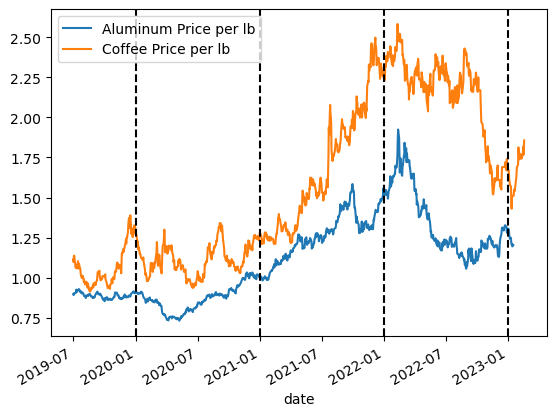

In [103]:
# Now we will check Aluminum and coffee

ax = df_prices.plot(x='date', y=['Aluminum Price per lb', 'Coffee Price per lb'], kind= 'line')
xcoords = ['1/1/2020','1/1/2021', '1/1/2022', '1/1/2023']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

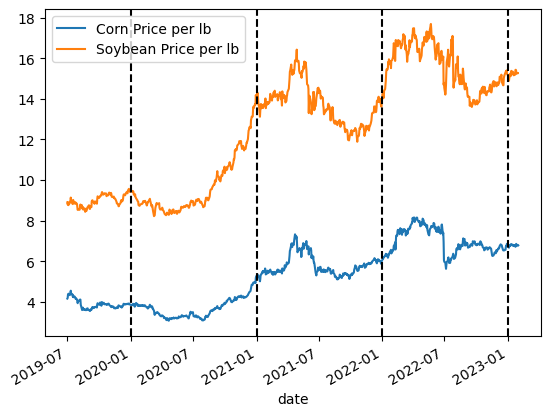

In [104]:
# Lastly we will check corn and soybeans.

ax = df_prices.plot(x='date', y=['Corn Price per lb', 'Soybean Price per lb'], kind= 'line')
xcoords = ['1/1/2020','1/1/2021', '1/1/2022', '1/1/2023']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

The vertical dashes represent January 1st of every year. It does not appear that there is very much seasonality at all with the price of commodities and that they tend to follow similar trends to each other regardless of the time of the year.

### Results of EDA

The data appears to be in decent shape with little cleaning needing to be done. The Aluminum price column was price per ton and has been converted to pounds to ensure that the commodities can be accurately compared to each other when looking for any correlation. There are no duplicate date which allows us to not worry about any price values in the data being incorrectly repeated which would throw off any analysis done. There are a few NaN values for the ends of some of the commodities but I am confident that it will not be an issue with forecasting and that these NaNs can be excluded. The NaN values represent less than 2% of the data so accurate forecasting will still be able to be done. It does appear that the commodity prices are fairly correlated with one another. I did not expect this and this will change the way the forecasting will be interpreted as some commodity price drops could indicate a drop in price coming for another indicating we should wait to buy. This will allow for real value changes to the prices of commodities to aid the forecasting estimates on when buying should be done. Lastly, it does not appear that there is any seasonality to the data. I was expecting there to possibly be some sort of trend with seasonality but on first glance this does not appear to be true. This will be further analyzed however though because seasonality can be a very helpful indicator in creating a buying schedule.


# Modeling

The goal of these models is to use machine learning alogirthms to be able to predict the future prices of these commodities in order to be able to purchase them at the most oportunistic time. These models will be based on price flucuations of these commodities over the last 4 years. Additionally, the prices will be compared to some national economic benchmarks such as unemployment rate, GDP, and inflation to determine if there is any correlation. These models will be intrepreted through visuals to better understand their impact and to help make a dashboard that can aid in any purchasing decisions by the company. As discussed in the EDA, the data has been cleaned and processed in order to ensure consistent measuring units for each commodity. Also, NaN values have been counted and at most represent slightly less than 2% of a commodities total data so they can be removed without worry of causing incorrect results.

In [105]:
#first we will drop NaN values from the data to ensure the models work correctly and import all libraries needed.
df_prices_clean = df_prices.dropna()

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [106]:
# We will change the date column to datetime from object to better work with it
df_prices_clean['date'] = pd.to_datetime(df_prices_clean['date'], format = '%Y-%m-%d')
df_prices_clean = df_prices_clean.sort_values(by=['date'],ascending=[True])
df_prices_clean.set_index('date', inplace = True)
print(df_prices_clean)

            Sugar Price per lb  Soybean Price per lb   Cotton Price per lb  \
date                                                                         
2019-07-01              0.1257                8.8975                0.6597   
2019-07-02              0.1235                8.7975                0.6657   
2019-07-03              0.1254                8.8975                0.6655   
2019-07-04              0.1254                8.7600                0.6655   
2019-07-05              0.1236                8.7900                0.6624   
...                        ...                   ...                   ...   
2023-01-10              0.1966               15.1200                0.8500   
2023-01-11              0.1968               15.3400                0.8400   
2023-01-12              0.1968               15.3800                0.8200   
2023-01-13              0.1968               15.2000                0.8200   
2023-01-16              0.1968               15.3400            

In [107]:
# The data does not contain values for the weekend so this line of code inputs the Friday value for both weekend days.
df_prices_clean = df_prices_clean.resample('D').ffill().reset_index()
print(df_prices_clean)

           date  Sugar Price per lb  Soybean Price per lb  \
0    2019-07-01              0.1257                8.8975   
1    2019-07-02              0.1235                8.7975   
2    2019-07-03              0.1254                8.8975   
3    2019-07-04              0.1254                8.7600   
4    2019-07-05              0.1236                8.7900   
...         ...                 ...                   ...   
1291 2023-01-12              0.1968               15.3800   
1292 2023-01-13              0.1968               15.2000   
1293 2023-01-14              0.1968               15.2000   
1294 2023-01-15              0.1968               15.2000   
1295 2023-01-16              0.1968               15.3400   

       Cotton Price per lb  Corn Price per lb  Coffee Price per lb  \
0                   0.6597             4.1550               1.1135   
1                   0.6657             4.1900               1.0965   
2                   0.6655             4.3675            

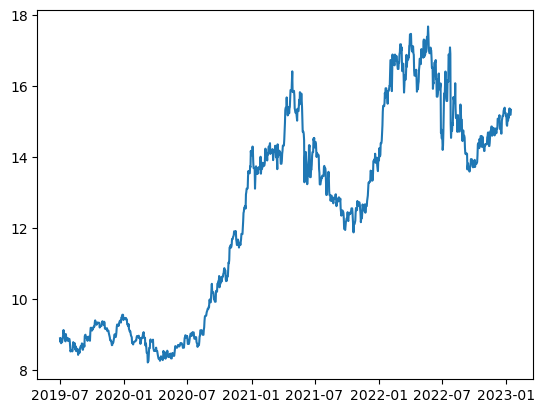

In [108]:
# Make sure our changes were successful
plt.plot(df_prices_clean['date'], df_prices_clean['Soybean Price per lb'],)

In [109]:
df_prices_clean.loc[df_prices_clean['date'] == '2022-04-01']

,date,Sugar Price per lb,Soybean Price per lb,Cotton Price per lb,Corn Price per lb,Coffee Price per lb,Soybean Oil price per lb,Aluminum Price per lb
1005,2022-04-01,0.1937,17.4675,1.3455,8.04,2.284,0.8021,1.539675


In [110]:
df_prices_clean.index = pd.to_datetime(df_prices_clean['date'], format='%Y-%m-%d')
del df_prices_clean['date']

In [202]:
GSPC_data = pd.read_csv('S&P data.csv')

In [203]:
GSPC_data.head()

,Date,Close
0,7/1/2019,2964.33
1,7/2/2019,2973.01
2,7/3/2019,2995.82
3,7/5/2019,2990.41
4,7/8/2019,2975.95


In [209]:
GSPC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    906 non-null    object 
 1   Close   906 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.3+ KB


<AxesSubplot:xlabel='Date'>

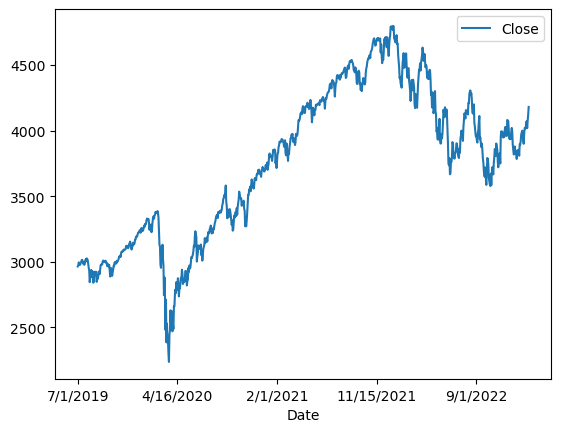

In [208]:
GSPC_data.plot(x = 'Date', y = 'Close')

<AxesSubplot:xlabel='Date'>

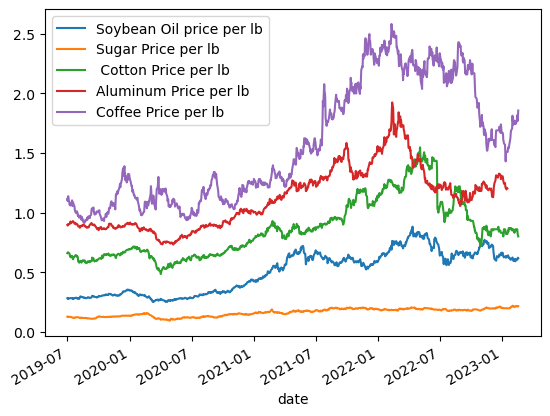

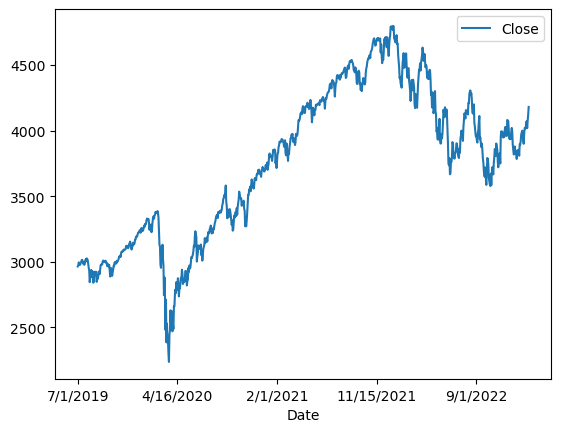

In [211]:
df_prices.plot(x='date', y=['Soybean Oil price per lb', 'Sugar Price per lb', ' Cotton Price per lb', 'Aluminum Price per lb', 'Coffee Price per lb'], kind= 'line')
GSPC_data.plot(x = 'Date', y = 'Close')

## Model Selection

There are multiple options for time series modeling such as Autoregressive Moving Average (ARMA) models which predict future values of stocks or commoditiy prices using their past values. There are extensions of ARMA models that take into account things like seasonality and non-stationary time series data using parameter tuning. Multiple tuning parameters of these ARMA models will be tested on the Sugar price per lb to see which most accurately predicts future price. The model that exhibits the best behavior will then be used on the rest of the commodities to predict their future prices. The data has been preprocessed and cleaned to aovid any problems with NA's or anything of the sort.

### Dickey Fuller Test

It is important to make sure that the data is stationary before we do any analysis on it. Stationary data means there are no existing trend that can already be observed in the data over time. If the data is found to be non-stationary then differencing must be done in order to make the data stationary

In [112]:
#ADF Test
from statsmodels.tsa.stattools import adfuller

In [113]:
series = df_prices_clean['Coffee Price per lb'].values

result = adfuller(series, autolag='AIC')

In [114]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s: %.3f' % (key,value))
    if result[0] < result[4]["5%"]:
        print("Reject Ho - Tine Series is Stationary")
    else:
        print("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -1.275753
p-value: 0.640191
Critical Values:
	1%: -3.435
Failed to Reject Ho - Time Series is Non-Stationary
	5%: -2.864
Failed to Reject Ho - Time Series is Non-Stationary
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary


In [115]:
df_prices_log = np.log(df_prices_clean)

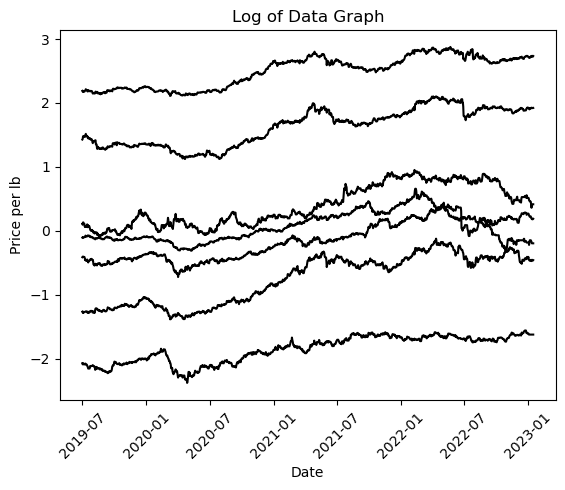

In [116]:
plt.plot(df_prices_log, color = "black")
plt.ylabel('Price per lb')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.title('Log of Data Graph')
plt.show()

### Test Training Split

It is important to to build a model that utilizes a portion of the data to train the model and a smaller portion to test the model's accuracy. This is to ensure that the model is not overfit to the data and can not be generalized to new data. We will use everything before July 2022 as the training set and everything after as the test set as this is about a 75% 25% split. For forecasting time series data it is standard practice to use previous data points to predict later data points and then compare those predictions to the actual data to see how well the model performs.

In [117]:
train = df_prices_log[df_prices_log.index < pd.to_datetime("2022-04-01", format='%Y-%m-%d')]
test = df_prices_log[df_prices_log.index > pd.to_datetime("2022-04-01", format ='%Y-%m-%d')]

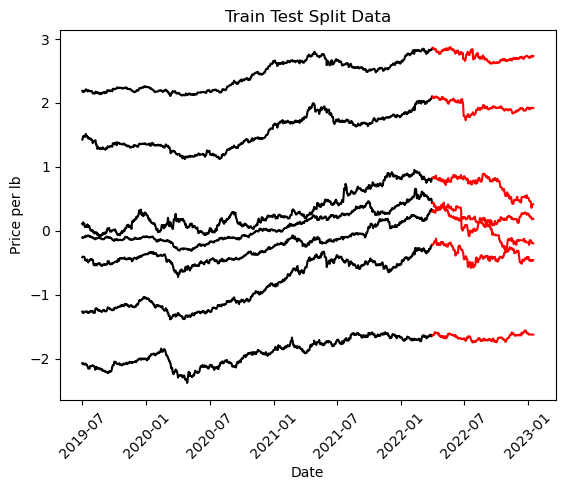

In [118]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Price per lb')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.title("Train Test Split Data")
plt.show()

In [119]:
train.index = pd.DatetimeIndex(train.index.values,
                              freq=train.index.inferred_freq)

In [120]:
test.index = pd.DatetimeIndex(test.index.values,
                             freq=test.index.inferred_freq)

In [121]:
df_prices_coffee = df_prices_log.iloc[:, [4]].copy()
print(df_prices_coffee)

            Coffee Price per lb
date                           
2019-07-01             0.107508
2019-07-02             0.092123
2019-07-03             0.127953
2019-07-04             0.127953
2019-07-05             0.105261
...                         ...
2023-01-12             0.405465
2023-01-13             0.412110
2023-01-14             0.412110
2023-01-15             0.412110
2023-01-16             0.412110

[1296 rows x 1 columns]


### Autoregressive Moving Average Model 

In [122]:
y = train['Coffee Price per lb']

In [123]:
#The parameters in the SARIMAX model correspond to the significance level of predictions. These parameters give a default alpha of .05 meaning there is a 5% chance the real value falls outside the upper or lower bounds
ARMAmodel = SARIMAX(y, order = (1,0,1))

In [124]:
ARMAmodel = ARMAmodel.fit()

In [125]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [126]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = .05)
y_pred_df.index = test.index
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_out = y_pred_df["Predictions"]


In [127]:
print(y_pred_out)

2022-04-02    0.816623
2022-04-03    0.816096
2022-04-04    0.815569
2022-04-05    0.815042
2022-04-06    0.814516
                ...   
2023-01-12    0.679317
2023-01-13    0.678878
2023-01-14    0.678440
2023-01-15    0.678002
2023-01-16    0.677564
Freq: D, Name: Predictions, Length: 290, dtype: float64


(array([18078., 18262., 18444., 18628., 18809., 18993., 19174., 19358.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

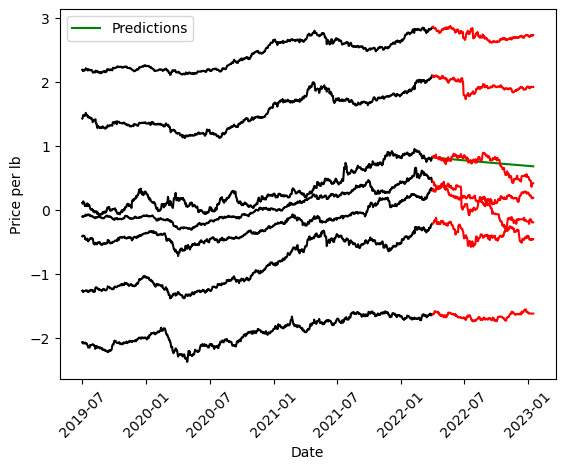

In [128]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Price per lb')
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation = 45)

In [129]:
arma_rmse = np.sqrt(mean_squared_error(test['Coffee Price per lb'].values, y_pred_df['Predictions']))
print("RMSE: ",arma_rmse)

RMSE:  0.12069583843688657


### Autoregressive Moving Average Model: Cross Validation and Hyperparameters

All possible hyper parameter values were tested at this stage to cross validate the model and ensure that the most optimal parameters were used. Only the best hyperparameters are shown for simplicities sake. The method for finding the best hyper parameters was to test all the possible combinations and compare the RMSE values of each to see which is the lowest meaning the model performs the best with them. Cross Validation is done to ensure that the model is not overfit to the training and test data and can be applied to other datasets. The way that it does this is by making multiple "folds" of the data to ensure that every parameter setting can have a chance to appear in the train and test set.

In [130]:
import warnings
warnings.filterwarnings("ignore")

In [131]:
ARMAmodel = SARIMAX(y, order = (1,0,1))

ARMAmodel = ARMAmodel.fit()
                        

In [132]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = .05)
y_pred_df.index = test.index
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_out = y_pred_df["Predictions"]

(array([18078., 18262., 18444., 18628., 18809., 18993., 19174., 19358.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

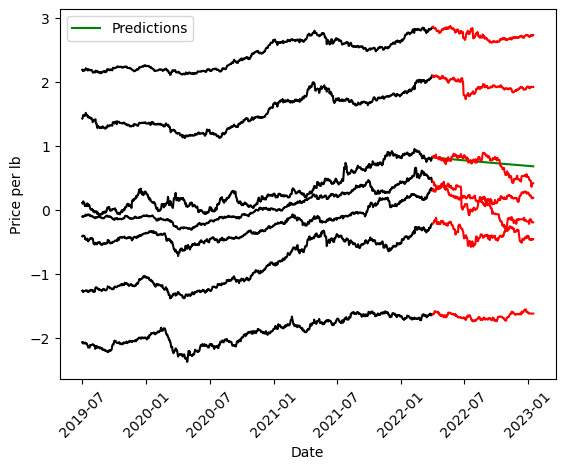

In [133]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Price per lb')
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation = 45)

In [134]:
arma_rmse = np.sqrt(mean_squared_error(test['Coffee Price per lb'].values, y_pred_df['Predictions']))
print("RMSE: ",arma_rmse)

RMSE:  0.12069583843688657


### Hyper Parameters
It seems that the most optimal hyperparameter tunings are 1,0,1. These values give the best RMSE value indicating that they create the best model so they will be used on all other commoditites

In [135]:
y1 = train['Sugar Price per lb']

In [136]:
ARMAmodel = SARIMAX(y1, order = (1,0,1))

ARMAmodel = ARMAmodel.fit()

In [137]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = .05)
y_pred_df.index = test.index
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_out = y_pred_df["Predictions"]

In [138]:
arma_rmse = np.sqrt(mean_squared_error(test["Sugar Price per lb"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  0.10256089307997338


In [139]:
y2 = train['Soybean Oil price per lb']

In [140]:
ARMAmodel = SARIMAX(y2, order = (1,0,1))

ARMAmodel = ARMAmodel.fit()

In [141]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = .05)
y_pred_df.index = test.index
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_out2 = y_pred_df["Predictions"]

In [142]:
arma_rmse = np.sqrt(mean_squared_error(test["Soybean Oil price per lb"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  0.20983283256533458


In [143]:
y3 = train[' Cotton Price per lb']

In [144]:
ARMAmodel = SARIMAX(y3, order = (1,0,1))

ARMAmodel = ARMAmodel.fit()

In [145]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = .05)
y_pred_df.index = test.index
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_out3 = y_pred_df["Predictions"]

In [146]:
arma_rmse = np.sqrt(mean_squared_error(test[" Cotton Price per lb"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  0.2931728413407919


In [147]:
y4 = train['Corn Price per lb']

In [148]:
ARMAmodel = SARIMAX(y4, order = (1,0,1))

ARMAmodel = ARMAmodel.fit()

In [149]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = .05)
y_pred_df.index = test.index
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_out4 = y_pred_df["Predictions"]

In [150]:
arma_rmse = np.sqrt(mean_squared_error(test["Corn Price per lb"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  0.15429773470324776


In [151]:
y5 = train['Aluminum Price per lb']

In [152]:
ARMAmodel = SARIMAX(y5, order = (1,0,1))

ARMAmodel = ARMAmodel.fit()

In [153]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = .05)
y_pred_df.index = test.index
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_out5 = y_pred_df["Predictions"]

In [154]:
arma_rmse = np.sqrt(mean_squared_error(test["Aluminum Price per lb"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  0.18894858956386132


In [155]:
y6 = train['Soybean Price per lb']

In [156]:
ARMAmodel = SARIMAX(y6, order = (1,0,1))

ARMAmodel = ARMAmodel.fit()

In [157]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = .05)
y_pred_df.index = test.index
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_out6 = y_pred_df["Predictions"]

In [158]:
arma_rmse = np.sqrt(mean_squared_error(test["Soybean Price per lb"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  0.1291121522759581


In [159]:
y7 = train['Coffee Price per lb']

In [160]:
ARMAmodel = SARIMAX(y7, order = (1,0,1))

ARMAmodel = ARMAmodel.fit()

In [161]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = .05)
y_pred_df.index = test.index
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_out7 = y_pred_df["Predictions"]

In [162]:
arma_rmse = np.sqrt(mean_squared_error(test["Coffee Price per lb"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  0.12069583843688657


(array([18078., 18262., 18444., 18628., 18809., 18993., 19174., 19358.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

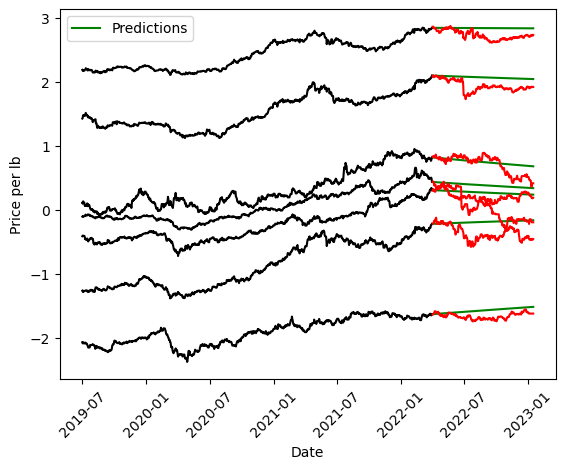

In [163]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.plot(y_pred_out2,color = 'green')
plt.plot(y_pred_out3,color = 'green')
plt.plot(y_pred_out4,color = 'green')
plt.plot(y_pred_out5,color = 'green')
plt.plot(y_pred_out6,color = 'green')
plt.plot(y_pred_out7,color = 'green')
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Price per lb')
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation = 45)

## Results and Findings

Overall the model performed with an average RMSE score of around .14. Normalized for the average value of the data, this means that the RMSE value is .14/(.94915- -.09266) = .1343. This is a fairly decent value indicating that the model can fairly accurately predict the future prices of these commodities. Due to the logarithmic transformation done in the data preprocessing to ensure the data was stationary, the data must be exponentiated in order to properly interpret the price.

In [164]:
df_prices_log['Coffee Price per lb'].max()

0.9491450687451022

In [165]:
df_prices_log['Coffee Price per lb'].min()

-0.09266368486341935

### Below is an example of how future results would be interpreted 

In [166]:
Coffee_predictions = np.exp(y_pred_out7)

In [167]:
Coffee_predictions

2022-04-02    2.262845
2022-04-03    2.261653
2022-04-04    2.260461
2022-04-05    2.259271
2022-04-06    2.258082
                ...   
2023-01-12    1.972530
2023-01-13    1.971665
2023-01-14    1.970801
2023-01-15    1.969938
2023-01-16    1.969076
Freq: D, Name: Predictions, Length: 290, dtype: float64

### How to use model in future data collection

In order to use this model to predict future prices, the input data for training the model would be all the way up to the current data and the predictions would be for the future. The model predictions behave in a linear manner due to being based on the logarithmic prices so it is most likely best to purchase the commodities in the middle of their predicted trend and it is best to not attempt to predict further out than 6 months in the future in order to maintain the most accurate results

In [217]:
from pandas.tseries.offsets import DateOffset

In [237]:
future_dates = [df_prices_log.index[-1]+ DateOffset(days=x) for x in range(0,365)]

In [238]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df_prices_log.columns)

In [240]:
future_df=pd.concat([df_prices_log,future_dates_df])

In [241]:
future_df['forecast'] = ARMAmodel.predict(start = '2023-02-01', end = '2024-01-15', dynamic = True)

In [244]:
future_df['forecast'].tail()

2024-01-11    0.345867
2024-01-12    0.345699
2024-01-13    0.345531
2024-01-14    0.345362
2024-01-15    0.345194
Name: forecast, dtype: float64

<AxesSubplot:>

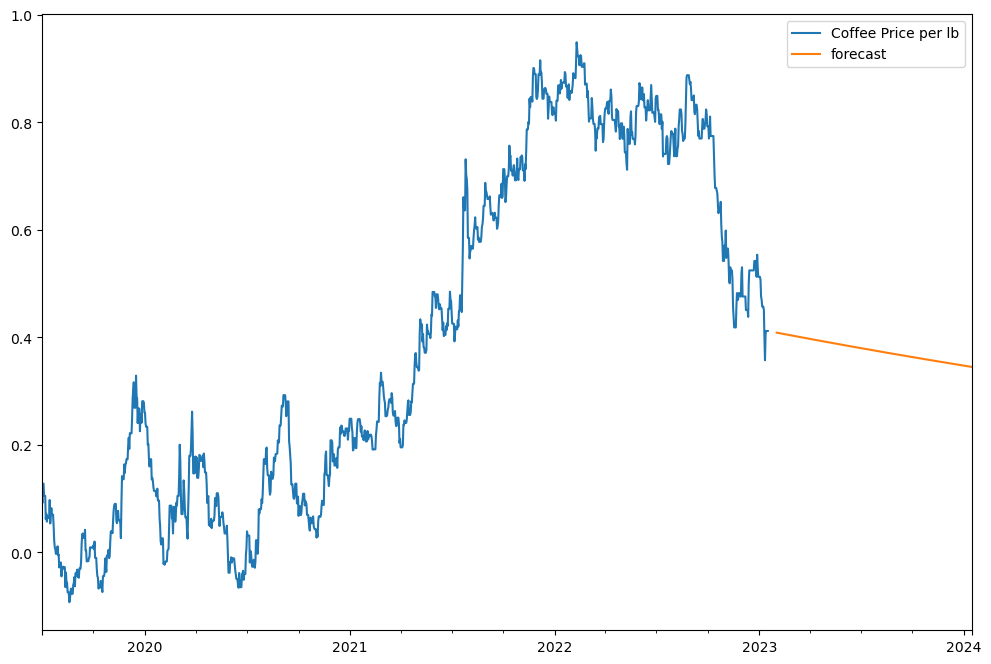

In [243]:
future_df[['Coffee Price per lb', 'forecast']].plot(figsize=(12,8))

In [245]:
Coffee_pred = np.exp(future_df.forecast)

In [251]:
Coffee_pred

2019-07-01         NaN
2019-07-02         NaN
2019-07-03         NaN
2019-07-04         NaN
2019-07-05         NaN
                ...   
2024-01-11    1.413215
2024-01-12    1.412977
2024-01-13    1.412739
2024-01-14    1.412502
2024-01-15    1.412264
Name: forecast, Length: 1660, dtype: float64